In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import edge_detection_MN as ednew

# Load bolometry images

In [2]:
crop_frames = ednew.fixed_crop_the_file('musicalrobot/IR_Video_Shared_Folder/tiff_files/10_17_19_PPA_Shallow_plate.tiff')
crop_frames2 = ednew.fixed_crop_the_file('musicalrobot/IR_Video_Shared_Folder/tiff_files/10_17_19_DDA_shallow_plate.tiff')
crop_frames3 = ednew.fixed_crop_the_file('musicalrobot/IR_Video_Shared_Folder/tiff_files/10_17_19_Fructose_shallow_plate.tiff')
crop_frames4 = ednew.fixed_crop_the_file('musicalrobot/IR_Video_Shared_Folder/tiff_files/10_17_19_quinine_shallow_plate.tiff')

## Read the files by old version

In [3]:
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frames, 3, 3)
sorted_regprops_2, s_temp_2, p_temp_2, inf_temp_2, m_df_2 = ed.inflection_temp(crop_frames2, 3, 3)
sorted_regprops_3, s_temp_3, p_temp_3, inf_temp_3, m_df_3 = ed.inflection_temp(crop_frames3, 3, 3)
sorted_regprops_4, s_temp_4, p_temp_4, inf_temp_4, m_df_4 = ed.inflection_temp(crop_frames4, 3, 3)

D:\You Hsin Chen\UW\Direct\Capstone Project\musical-robot-ver2\musicalrobot\edge_detection.py:293: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


## Read the files by new version

In [4]:
sorted_regprops_v2, s_temp_v2, p_temp_v2, inf_temp_v2, m_df_v2 = ednew.inflection_temp(crop_frames, 3, 3, 2)
sorted_regprops_v2_2, s_temp_v2_2, p_temp_v2_2, inf_temp_v2_2, m_df_v2_2 = ednew.inflection_temp(crop_frames2, 3, 3, 2)
sorted_regprops_v2_3, s_temp_v2_3, p_temp_v2_3, inf_temp_v2_3, m_df_v2_3 = ednew.inflection_temp(crop_frames3, 3, 3, 2)
sorted_regprops_v2_4, s_temp_v2_4, p_temp_v2_4, inf_temp_v2_4, m_df_v2_4 = ednew.inflection_temp(crop_frames4, 3, 3, 2)

D:\You Hsin Chen\UW\Direct\Capstone Project\musical-robot-ver2\musicalrobot\edge_detection_MN.py:540: RuntimeWarning: invalid value encountered in true_divide
  derivative = gradient[:,1]/gradient[:,0]


31 frames skipped due to missing samples
469 frames skipped due to missing samples
302 frames skipped due to missing samples


## Standard Deviation Differences between the old version and the new version
#### Calculate and plot std of sample temperatures at each frame

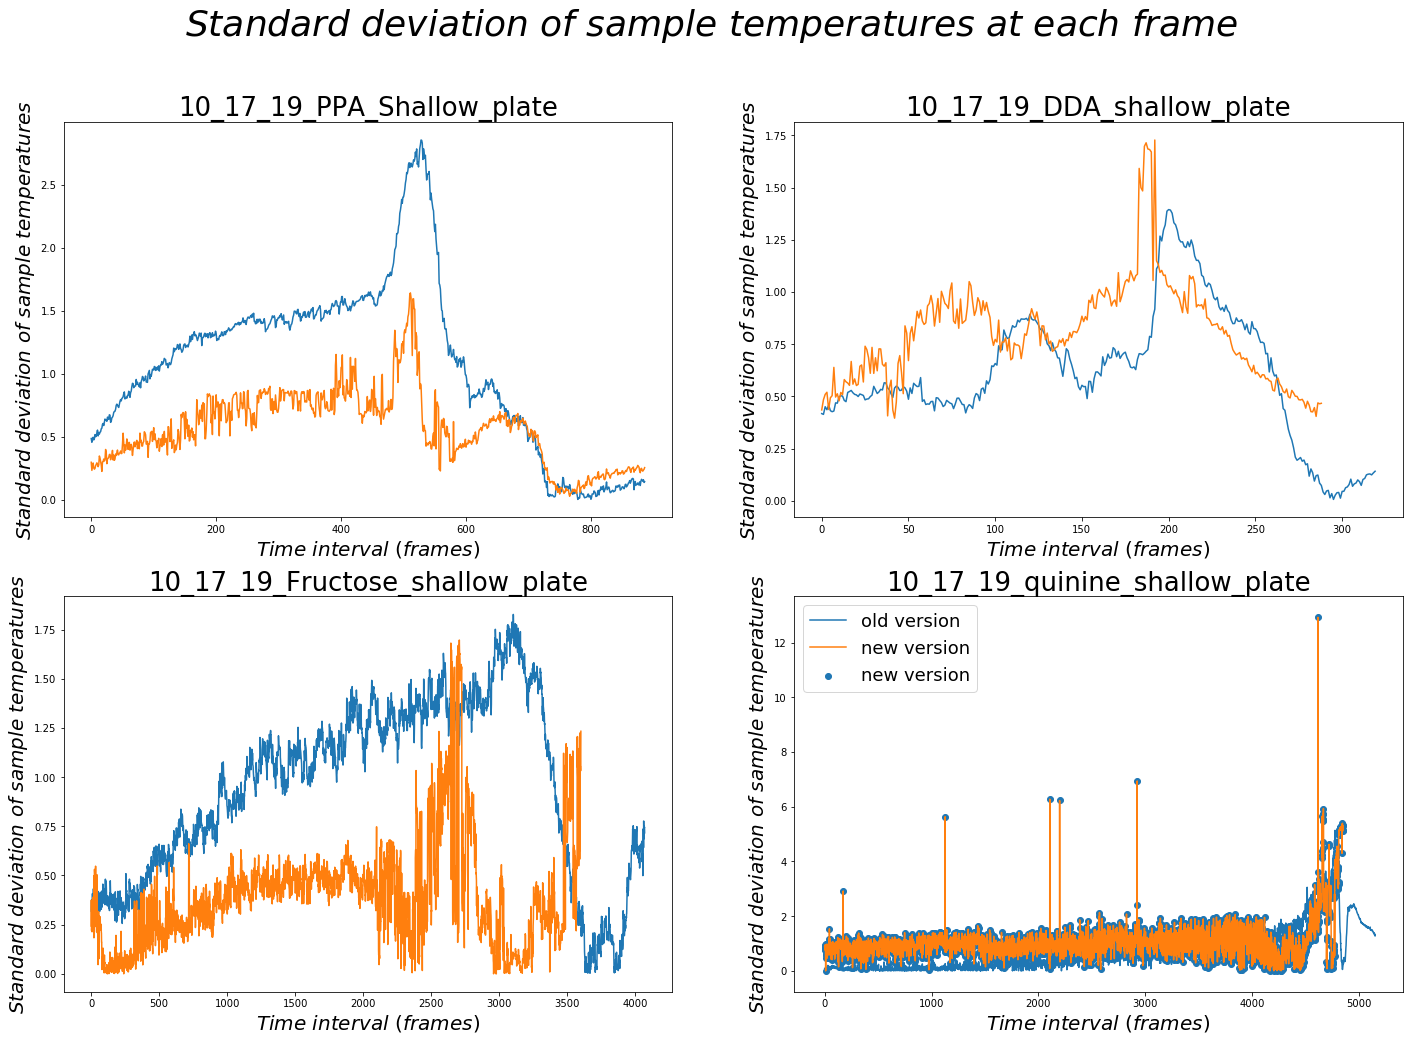

In [7]:
std_old = []
std_old_2 = []
std_old_3 = []
std_old_4 = []
std_new = []
std_new_2 = []
std_new_3 = []
std_new_4 = []
s_temp_old_group = [s_temp, s_temp_2, s_temp_3, s_temp_4]
s_temp_new_group = [s_temp_v2, s_temp_v2_2, s_temp_v2_3, s_temp_v2_4]
std_old_group = [std_old, std_old_2, std_old_3, std_old_4]
std_new_group = [std_new, std_new_2, std_new_3, std_new_4]
for j in range(len(s_temp_old_group)):
    for i in range(len(s_temp_old_group[j][0])):
        total_old = 0
        for x in range(len(s_temp_old_group[j])):
            total_old += s_temp_old_group[j][x][i]
        mean_old = total_old/len(s_temp_old_group[j])
        for x in range(len(s_temp_old_group[j])):
            mean_square_old = np.mean(np.abs(s_temp_old_group[j][x][i] - mean_old)**2)
        std_old_group[j].append(np.sqrt(mean_square_old))
for k in range(len(s_temp_new_group)):
    for i in range(len(s_temp_new_group[k][0])):
        total_new = 0
        for x in range(len(s_temp_new_group[k])):
            total_new += s_temp_new_group[k][x][i]
        mean_new = total_new/len(s_temp_new_group[k])
        for x in range(len(s_temp_new_group[k])):
            mean_square_new = np.mean(np.abs(s_temp_new_group[k][x][i] - mean_new)**2)
        std_new_group[k].append(np.sqrt(mean_square_new))
sample_temp = plt.figure(figsize=(24,16))
sample_temp.suptitle("$Standard$ $deviation$ $of$ $sample$ $temperatures$ $at$ $each$ $frame$", fontsize=36)
ax1 = sample_temp.add_subplot(221)
ax1.plot(range(len(s_temp_old_group[0][0])), std_old_group[0], label='old version')
ax1.plot(range(len(s_temp_new_group[0][0])), std_new_group[0], label='new version')
ax1.set_title("10_17_19_PPA_Shallow_plate", fontsize=26)
ax1.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=20)
ax1.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=20)
ax2 = sample_temp.add_subplot(222)
ax2.plot(range(len(s_temp_old_group[1][0])), std_old_group[1], label='old version')
ax2.plot(range(len(s_temp_new_group[1][0])), std_new_group[1], label='new version')
ax2.set_title("10_17_19_DDA_shallow_plate", fontsize=26)
ax2.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=20)
ax2.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=20)
ax3 = sample_temp.add_subplot(223)
ax3.plot(range(len(s_temp_old_group[2][0])), std_old_group[2], label='old version')
ax3.plot(range(len(s_temp_new_group[2][0])), std_new_group[2], label='new version')
ax3.set_title("10_17_19_Fructose_shallow_plate", fontsize=26)
ax3.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=20)
ax3.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=20)
ax4 = sample_temp.add_subplot(224)
ax4.plot(range(len(s_temp_old_group[3][0])), std_old_group[3], label='old version')
ax4.plot(range(len(s_temp_new_group[3][0])), std_new_group[3], label='new version')
ax4.scatter(range(len(s_temp_new_group[3][0])), std_new_group[3], label='new version')
ax4.set_title("10_17_19_quinine_shallow_plate", fontsize=26)
ax4.set_xlabel("$Time$ $interval$ $(frames)$", fontsize=20)
ax4.set_ylabel("$Standard$ $deviation$ $of$ $sample$ $temperatures$", fontsize=20)
plt.legend(fontsize=18)
plt.show()

#### Temperature at inflection points (melting temperature)

In [6]:
std_melt_temp = np.std(inf_temp)
std_melt_temp_v2 = np.std(inf_temp_v2)
std_melt_temp_2 = np.std(inf_temp_2)
std_melt_temp_v2_2 = np.std(inf_temp_v2_2)
std_melt_temp_3 = np.std(inf_temp_3)
std_melt_temp_v2_3 = np.std(inf_temp_v2_3)
std_melt_temp_4 = np.std(inf_temp_4)
std_melt_temp_v2_4 = np.std(inf_temp_v2_4)
std_melt_temp_group = [std_melt_temp, std_melt_temp_2, std_melt_temp_3, std_melt_temp_4]
std_melt_temp_v2_group = [std_melt_temp_v2, std_melt_temp_v2_2, std_melt_temp_v2_3, std_melt_temp_v2_4]
mean_melt_temp = np.mean(inf_temp)
mean_melt_temp_v2 = np.mean(inf_temp_v2)
mean_melt_temp_2 = np.mean(inf_temp_2)
mean_melt_temp_v2_2 = np.mean(inf_temp_v2_2)
mean_melt_temp_3 = np.mean(inf_temp_3)
mean_melt_temp_v2_3 = np.mean(inf_temp_v2_3)
mean_melt_temp_4 = np.mean(inf_temp_4)
mean_melt_temp_v2_4 = np.mean(inf_temp_v2_4)
mean_melt_temp_group = [mean_melt_temp, mean_melt_temp_2, mean_melt_temp_3, mean_melt_temp_4]
mean_melt_temp_v2_group = [mean_melt_temp_v2, mean_melt_temp_v2_2, mean_melt_temp_v2_3, mean_melt_temp_v2_4]
tiff_group = ["10_17_19_PPA_Shallow_plate", "10_17_19_DDA_shallow_plate", "10_17_19_Fructose_shallow_plate", "10_17_19_quinine_shallow_plate"]
for i in range(len(std_melt_temp_group)):
    print("File name: "+tiff_group[i])
    print("Old version:")
    print("standard deviation of melting temperature: " + str('%.3f'%std_melt_temp_group[i]))
    print("mean of melting temperature: " + str('%.3f'%mean_melt_temp_group[i]))
    print("New version:")
    print("standard deviation of melting temperature: " + str('%.3f'%std_melt_temp_v2_group[i]))
    print("mean of melting temperature: " + str('%.3f'%mean_melt_temp_v2_group[i]))
    print()

File name: 10_17_19_PPA_Shallow_plate
Old version:
standard deviation of melting temperature: 3.133
mean of melting temperature: 42.232
New version:
standard deviation of melting temperature: 1.860
mean of melting temperature: 47.947

File name: 10_17_19_DDA_shallow_plate
Old version:
standard deviation of melting temperature: 3.848
mean of melting temperature: 43.646
New version:
standard deviation of melting temperature: 2.587
mean of melting temperature: 41.429

File name: 10_17_19_Fructose_shallow_plate
Old version:
standard deviation of melting temperature: 10.387
mean of melting temperature: 78.867
New version:
standard deviation of melting temperature: 6.953
mean of melting temperature: 85.946

File name: 10_17_19_quinine_shallow_plate
Old version:
standard deviation of melting temperature: 4.268
mean of melting temperature: 98.401
New version:
standard deviation of melting temperature: 7.158
mean of melting temperature: 109.276

